In [1]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('FinalAnalysis.xlsx')

# Display the first few rows of the dataset to understand its structure
data.head()


,Year,Inter Cluster Upset Rate,Average Attendance,Net Spend Disparity,GBI,HICB
0,2003-04,21.71,35009,6.870079,1.1284,1.0821
1,2004-05,8.30,33891,5.619676,1.0990,1.1045
2,2005-06,16.66,33873,3.755595,1.1259,1.1164
3,2006-07,15.33,34364,3.263466,1.0545,1.0879
4,2007-08,5.88,36076,2.892878,1.2500,1.1368


In [2]:
# Compute Pearson correlation coefficients
correlation_gbi = data["Inter Cluster Upset Rate"].corr(data["GBI"])
correlation_hicb = data["Inter Cluster Upset Rate"].corr(data["HICB"])

correlation_gbi, correlation_hicb


(-0.11214692340675703, -0.5438561410924756)

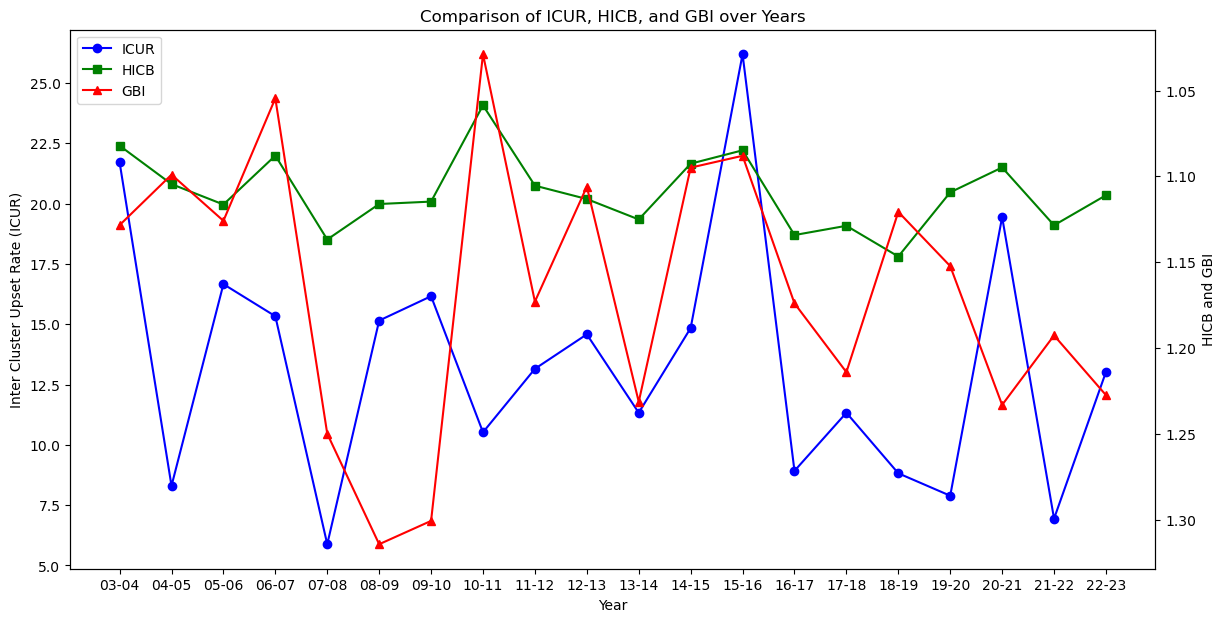

In [4]:
import matplotlib.pyplot as plt
# Modify the Year column to have the desired format
data["ShortYear"] = data["Year"].apply(lambda x: "{}-{}".format(x.split('-')[0][-2:], x.split('-')[1][-2:]))

# Set figure size
plt.figure(figsize=(14, 7))

# Plot ICUR on primary Y-axis using the modified year labels
line1, = plt.plot(data["ShortYear"], data["Inter Cluster Upset Rate"], label="ICUR", color='blue', marker='o')

# Set labels for primary Y-axis and X-axis
plt.xlabel("Year")
plt.ylabel("Inter Cluster Upset Rate (ICUR)")

# Set up secondary Y-axis
ax2 = plt.gca().twinx()

# Plot HICB and GBI on secondary Y-axis
line2, = ax2.plot(data["ShortYear"], data["HICB"], label="HICB", color='green', marker='s')
line3, = ax2.plot(data["ShortYear"], data["GBI"], label="GBI", color='red', marker='^')

# Invert the secondary Y-axis
ax2.invert_yaxis()

# Set label for secondary Y-axis
ax2.set_ylabel("HICB and GBI")

# Set title
plt.title("Comparison of ICUR, HICB, and GBI over Years")

# Create a single legend for all lines
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc="upper left")

# Display the plot
plt.show()
